# **Tobacco Use and Mortality**

In [5]:
# Import required libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Load dataset
df = pd.read_csv("smokers.csv")

# Display dataset structure
print(df.info())  # Check data types and missing values
print(df.head())  # Preview first few rows

# Check for missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB
None
   Year      Method  Sex  16 and Over  16-24  25-34  35-49  50-59  60 and Over
0  1974  Unweighted  NaN           46     44     51     52     50           33
1  1976  Unweighted  NaN           42     42     45     48     48           30
2  1978  Unweighted  NaN           40     39     45     45     45           30
3  1980  Unweighted  NaN           39     37     46     44     45           

In [6]:
# Fill missing values in 'Sex' column with 'Unknown'
df['Sex'].fillna('Unknown', inplace=True)

# Convert 'Year' column to integer for better plotting
df['Year'] = df['Year'].astype(int)

# Verify changes
print("Missing values after cleaning:\n", df.isnull().sum())
print(df.head())


Missing values after cleaning:
 Year           0
Method         0
Sex            0
16 and Over    0
16-24          0
25-34          0
35-49          0
50-59          0
60 and Over    0
dtype: int64
   Year      Method      Sex  16 and Over  16-24  25-34  35-49  50-59  \
0  1974  Unweighted  Unknown           46     44     51     52     50   
1  1976  Unweighted  Unknown           42     42     45     48     48   
2  1978  Unweighted  Unknown           40     39     45     45     45   
3  1980  Unweighted  Unknown           39     37     46     44     45   
4  1982  Unweighted  Unknown           35     35     38     39     41   

   60 and Over  
0           33  
1           30  
2           30  
3           29  
4           27  


C:\Users\hp\AppData\Local\Temp\ipykernel_14588\1304785912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna('Unknown', inplace=True)


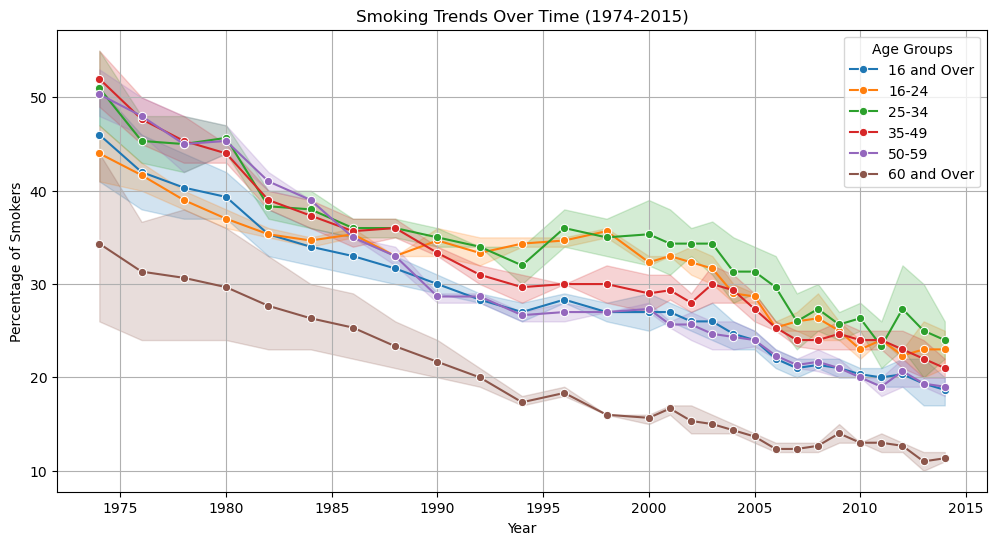

In [7]:
plt.figure(figsize=(12,6))

# Line plots for different age groups
sns.lineplot(x='Year', y='16 and Over', data=df, marker='o', label="16 and Over")
sns.lineplot(x='Year', y='16-24', data=df, marker='o', label="16-24")
sns.lineplot(x='Year', y='25-34', data=df, marker='o', label="25-34")
sns.lineplot(x='Year', y='35-49', data=df, marker='o', label="35-49")
sns.lineplot(x='Year', y='50-59', data=df, marker='o', label="50-59")
sns.lineplot(x='Year', y='60 and Over', data=df, marker='o', label="60 and Over")

plt.title("Smoking Trends Over Time (1974-2015)")
plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")
plt.legend(title="Age Groups")
plt.grid()
plt.show()


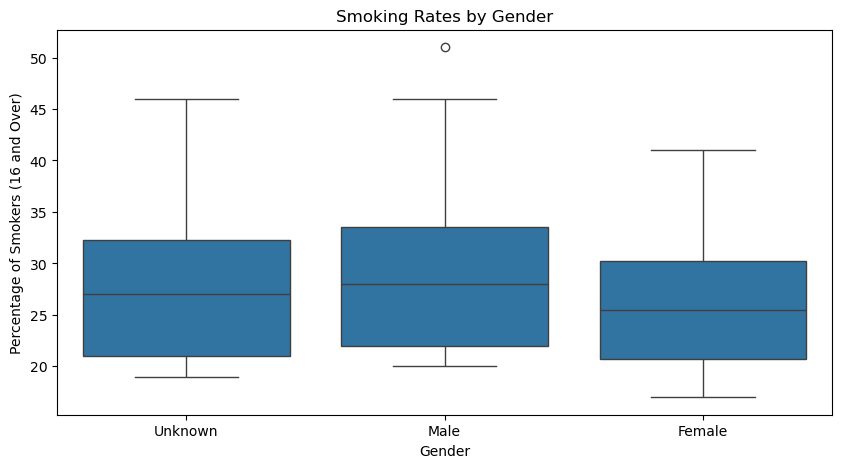

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sex', y='16 and Over', data=df)
plt.title("Smoking Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Smokers (16 and Over)")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define Features (X) and Target (y)
X = df[['Year']]  # Using Year as predictor
y = df['16 and Over']  # Predicting overall smoking prevalence

# Train-Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1.541301820728293
R-Squared Score: 0.918654682603963


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('fatalities.csv')

# Display the first few rows of the dataset
print(data.head())


   Year                                         ICD10 Code  \
0  2014                                          All codes   
1  2014  C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...   
2  2014                                            C00-D48   
3  2014                                            J00-J99   
4  2014                                            I00-I99   

                             ICD10 Diagnosis  \
0                                 All deaths   
1  All deaths which can be caused by smoking   
2                                All cancers   
3                   All respiratory diseases   
4                   All circulatory diseases   

                              Diagnosis Type                     Metric  Sex  \
0                                 All deaths  Number of observed deaths  NaN   
1  All deaths which can be caused by smoking  Number of observed deaths  NaN   
2                                All cancers  Number of observed deaths  NaN   
3                 

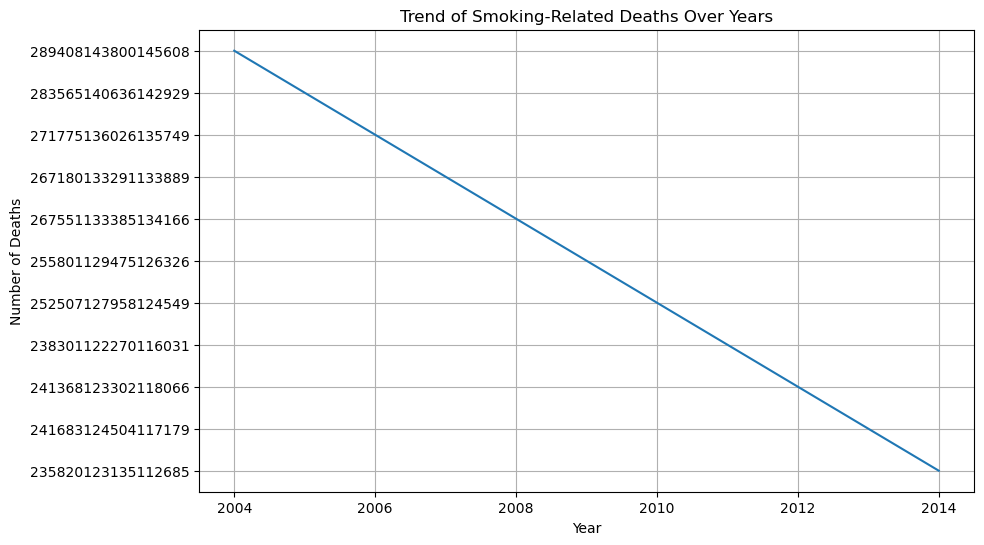

In [20]:
# Filter data for smoking-related deaths
smoking_deaths = data[data['ICD10 Diagnosis'].str.contains("smoking", na=False)]

# Group by year and sum the values
trend = smoking_deaths.groupby('Year')['Value'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x='Year', y='Value')
plt.title('Trend of Smoking-Related Deaths Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

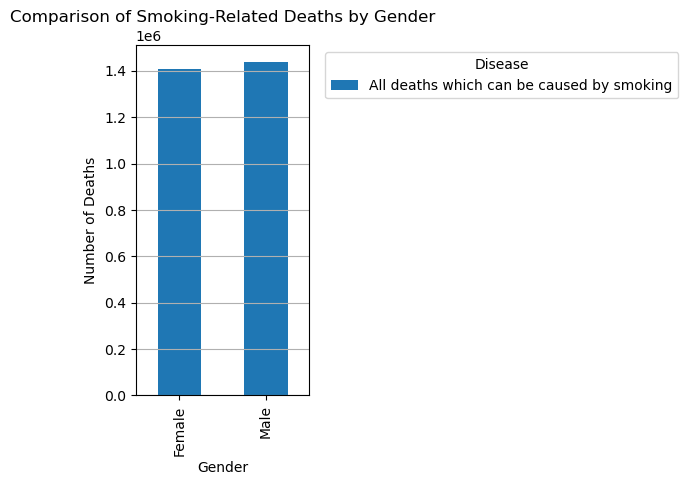

In [26]:
# Filter data for smoking-related deaths by gender
# Ensure that we only include relevant columns and drop any rows with missing values
gender_deaths = smoking_deaths[['Sex', 'ICD10 Diagnosis', 'Value']].dropna()

# Convert the 'Value' column to numeric, forcing errors to NaN
gender_deaths['Value'] = pd.to_numeric(gender_deaths['Value'], errors='coerce')

# Group by gender and disease, summing the values
gender_summary = gender_deaths.groupby(['Sex', 'ICD10 Diagnosis'])['Value'].sum().unstack(fill_value=0)

# Check if the DataFrame is empty
if gender_summary.empty:
    print("No data available for plotting.")
else:
    # Plotting the gender comparison
    plt.figure(figsize=(10, 6))
    gender_summary.plot(kind='bar', stacked=True)
    plt.title('Comparison of Smoking-Related Deaths by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Deaths')
    plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


In [32]:
  print(smoking_deaths.dtypes)

Year                int64
ICD10 Code         object
ICD10 Diagnosis    object
Diagnosis Type     object
Metric             object
Sex                object
Value              object
dtype: object


In [34]:
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  

In [38]:
  print(disease_deaths)

ICD10 Diagnosis
All deaths which can be caused by smoking    2358201231351126852416831245041171792413681233...
Name: Value, dtype: object


ICD10 Diagnosis
Kidney and Renal Pelvis                 8007001008007001008007001008007001008007001008...
All diseases of the digestive system    8005003009005004001000500400110060050012006006...
Stomach / Duodenal Ulcer                8005003009005004001000500400110060050012006006...
All deaths                              7780047000308007820047200310007870047300314007...
Ischaemic Heart Disease                 7400510023007600520024007800530025008300560027...
Stomach                                 7006001007006002008006002008006002008006002009...
Larynx                                  5004001005004001005004001005004001005004001005...
Oesophagus                              4100290012004100290012004100300012004100290012...
Pneumonia, Influenza                    4100240017004000230017004300240020004400240020...
Myeloid Leukaemia                       4003001004003001004003001004003001004003001004...
Other arterial disease                  40020020040020020040020020040020030040020030

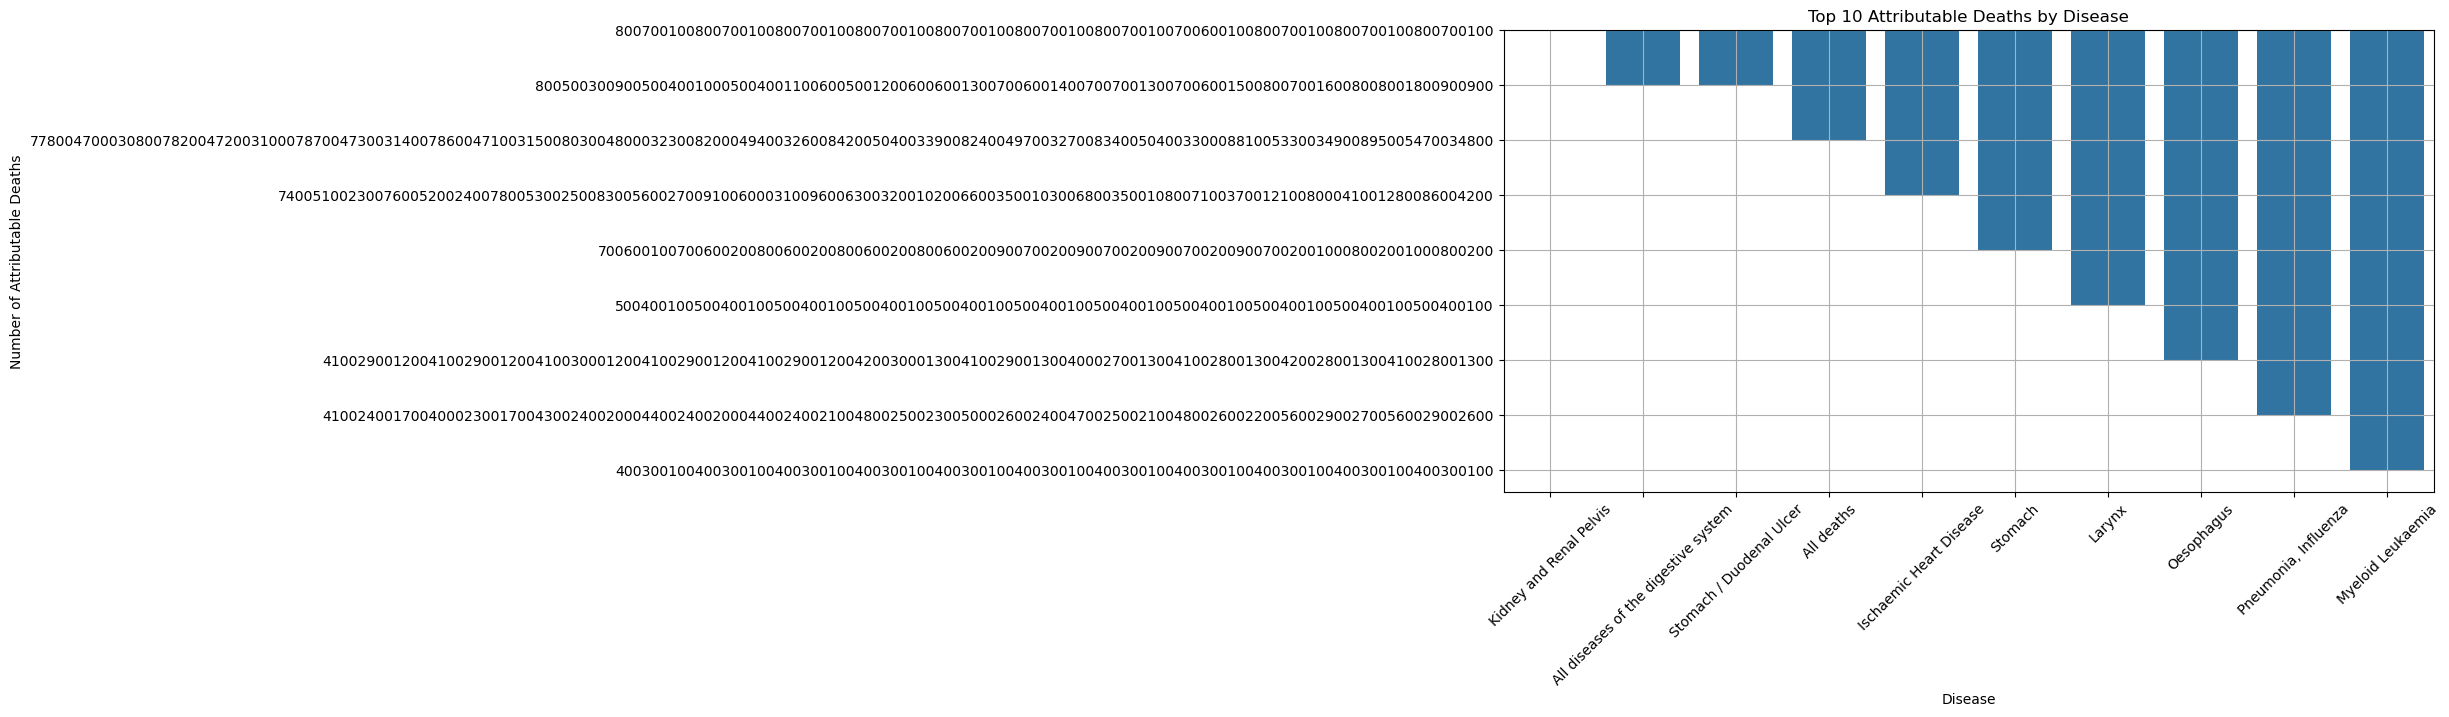

In [30]:
# Filter for attributable deaths
attributable_deaths = data[data['Metric'] == 'Attributable number']

# Group by disease and sum the values
attributable_summary = attributable_deaths.groupby('ICD10 Diagnosis')['Value'].sum().sort_values(ascending=False)

# Display the summary
print(attributable_summary)

# Plotting the attributable deaths
plt.figure(figsize=(12, 6))
sns.barplot(x=attributable_summary.index[:10], y=attributable_summary.values[:10])
plt.title('Top 10 Attributable Deaths by Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Attributable Deaths')
plt.xticks(rotation=45)
plt.grid()
plt.show()
